# Projet de machine learning utilisant le dataset de kank mrketing d'une banque portuguaise.
## On va utiliser les modeles de classification pour predire si un client va souscrire ou non à une offre bancaire via marketing direct (appel telphonique)

## Setup libraries

In [74]:
import pandas as pd
import numpy as numpy
import matplotlib as mp

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [53]:
bank_file_path = "input/bank-additional-full.csv"
bank_data = pd.read_csv(bank_file_path, sep=";")

#print(bank_data.head())
#print(bank_data.describe())
#print(bank_data.info())
bank_data.shape

(41188, 21)

In [58]:
def read_file(path):
    bank_data = pd.read_csv(bank_file_path, sep=";")
    return bank_data

bank_file_path = "input/bank-additional-full.csv"
bank_data  = read_file(bank_file_path)
bank_data.dtypes

age                 int64
job                   str
marital               str
education             str
default               str
housing               str
loan                  str
contact               str
month                 str
day_of_week           str
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome              str
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                     str
dtype: object

## Extraire les données d'entrainement des données de tests


In [59]:

X = bank_data.drop(["y"], axis=1)
y = bank_data['y']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, random_state=0)


In [ ]:
num_cols = [col for col in X_train.columns if X_train[col].dtype in ['int64', 'float64']]
#num_cols = X_train.select_dtypes(include=['int64', 'float64'])
cat_cols = [col for col in X_train.columns if X_train[col].dtype in ['str']]
#cat_cols = X_train.select_dtypes(include=['str'])
#print(num_cols)
#print(cat_cols)
print(X_train[num_cols].head())



       age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
29321   40       501         3    999         0          -1.8          93.075   
23925   33        59         2    999         0           1.4          93.444   
39148   31       292         2    999         1          -1.8          93.369   
12078   29        76         1    999         0           1.4          94.465   
41021   29       168         2    999         0          -1.1          94.601   

       cons.conf.idx  euribor3m  nr.employed  
29321          -47.1      1.405       5099.1  
23925          -36.1      4.963       5228.1  
39148          -34.8      0.655       5008.7  
12078          -41.8      4.947       5228.1  
41021          -49.5      1.029       4963.6  


In [73]:
# Scaling des variables numériques
scaler = StandardScaler()
X_train_scal = scaler.fit_transform(X_train[num_cols])
X_train_scal

array([[ 0.00318242,  0.93980938,  0.15883399, ..., -1.42475077,
        -1.27806551, -0.93910481],
       [-0.66777237, -0.7662243 , -0.20435685, ...,  0.9522724 ,
         0.77301376,  0.84367526],
       [-0.85947374,  0.1331102 , -0.20435685, ...,  1.23319333,
        -1.7104178 , -2.18843286],
       ...,
       [-1.05117511,  0.65418383,  0.15883399, ..., -1.42475077,
        -1.3011243 , -0.93910481],
       [-0.476071  , -0.56551445, -0.5675477 , ...,  0.9522724 ,
         0.77301376,  0.84367526],
       [ 1.15339063, -0.48445855, -0.5675477 , ...,  0.8874445 ,
         0.71306091,  0.33095324]], shape=(32950, 10))

## Visualisation

<Axes: >

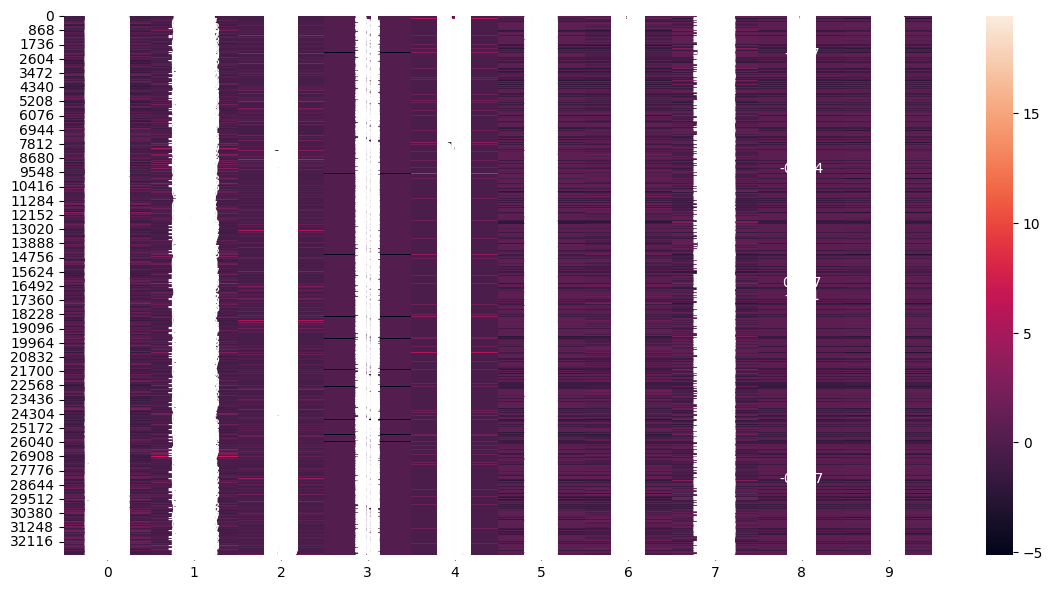

In [ ]:
#heatmap
plt.figure(figsize=(14,7))
